In [60]:
from nltk.tokenize import TweetTokenizer
import nltk
tknzr = TweetTokenizer()


In [61]:
class Words:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {}
        self.n_words = 0
      
    def index_words(self, sentence):
        for word in tknzr.tokenize(sentence.lower().replace(".net", "dotnet")):
            self.index_word(word)

    def index_word(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

In [62]:
import pandas as pd

In [63]:
df = pd.read_csv('seek_jobs_Melbourne.csv')

In [64]:
df.head()

,id,listingDate,location,title,teaser,companyName
0,35672363,2018-03-16T13:00:00Z,Melbourne,Sales Key Account Manager,Excellent opportunity for an experienced astut...,None
1,35698570,2018-03-16T13:00:00Z,Melbourne,Graduate Software Developer,This role will suit someone who loves problem ...,Integrated Application Development
2,35774279,2018-03-17T00:18:01Z,Melbourne,TIBCO Integration <b>Developer</b>,Are you a TIBCO <b>developer</b> looking for a...,The Citadel Group
3,35766625,2018-03-16T02:13:29Z,Melbourne,Sr Analyst Programmer(Axway API <b>Developer</b>),Sr. Analyst Programmer( Axway API <b>Developer...,Adaps IT
4,35772233,2018-03-16T06:50:16Z,Melbourne,Senior Software <b>Developer</b> Big Data,"As a senior software <b>developer</b>, play a ...",Coles Group


In [65]:
titles = df["title"].values
teasers = df["teaser"].values
words = Words('words')

In [66]:
for title in titles:
    words.index_words(title)
for teaser in teasers:
    words.index_words(teaser)

In [67]:
filter_dict = {'asp.net':1,'node':1,'nodejs':1,'full-stack':1,'python':1,'php':1,'ios':1,'android':1,'docker':1,'aws':1,'javascript':1,'vue':1,'java':1,'dotnet':1,'react':1,'angularjs':1,'angular':1}

In [68]:
data = []
labels = []

for k,v in sorted(words.word2count.items(), key=lambda x:x[1],reverse=True):
    if k in filter_dict:
        labels.append(k)
        data.append(v)

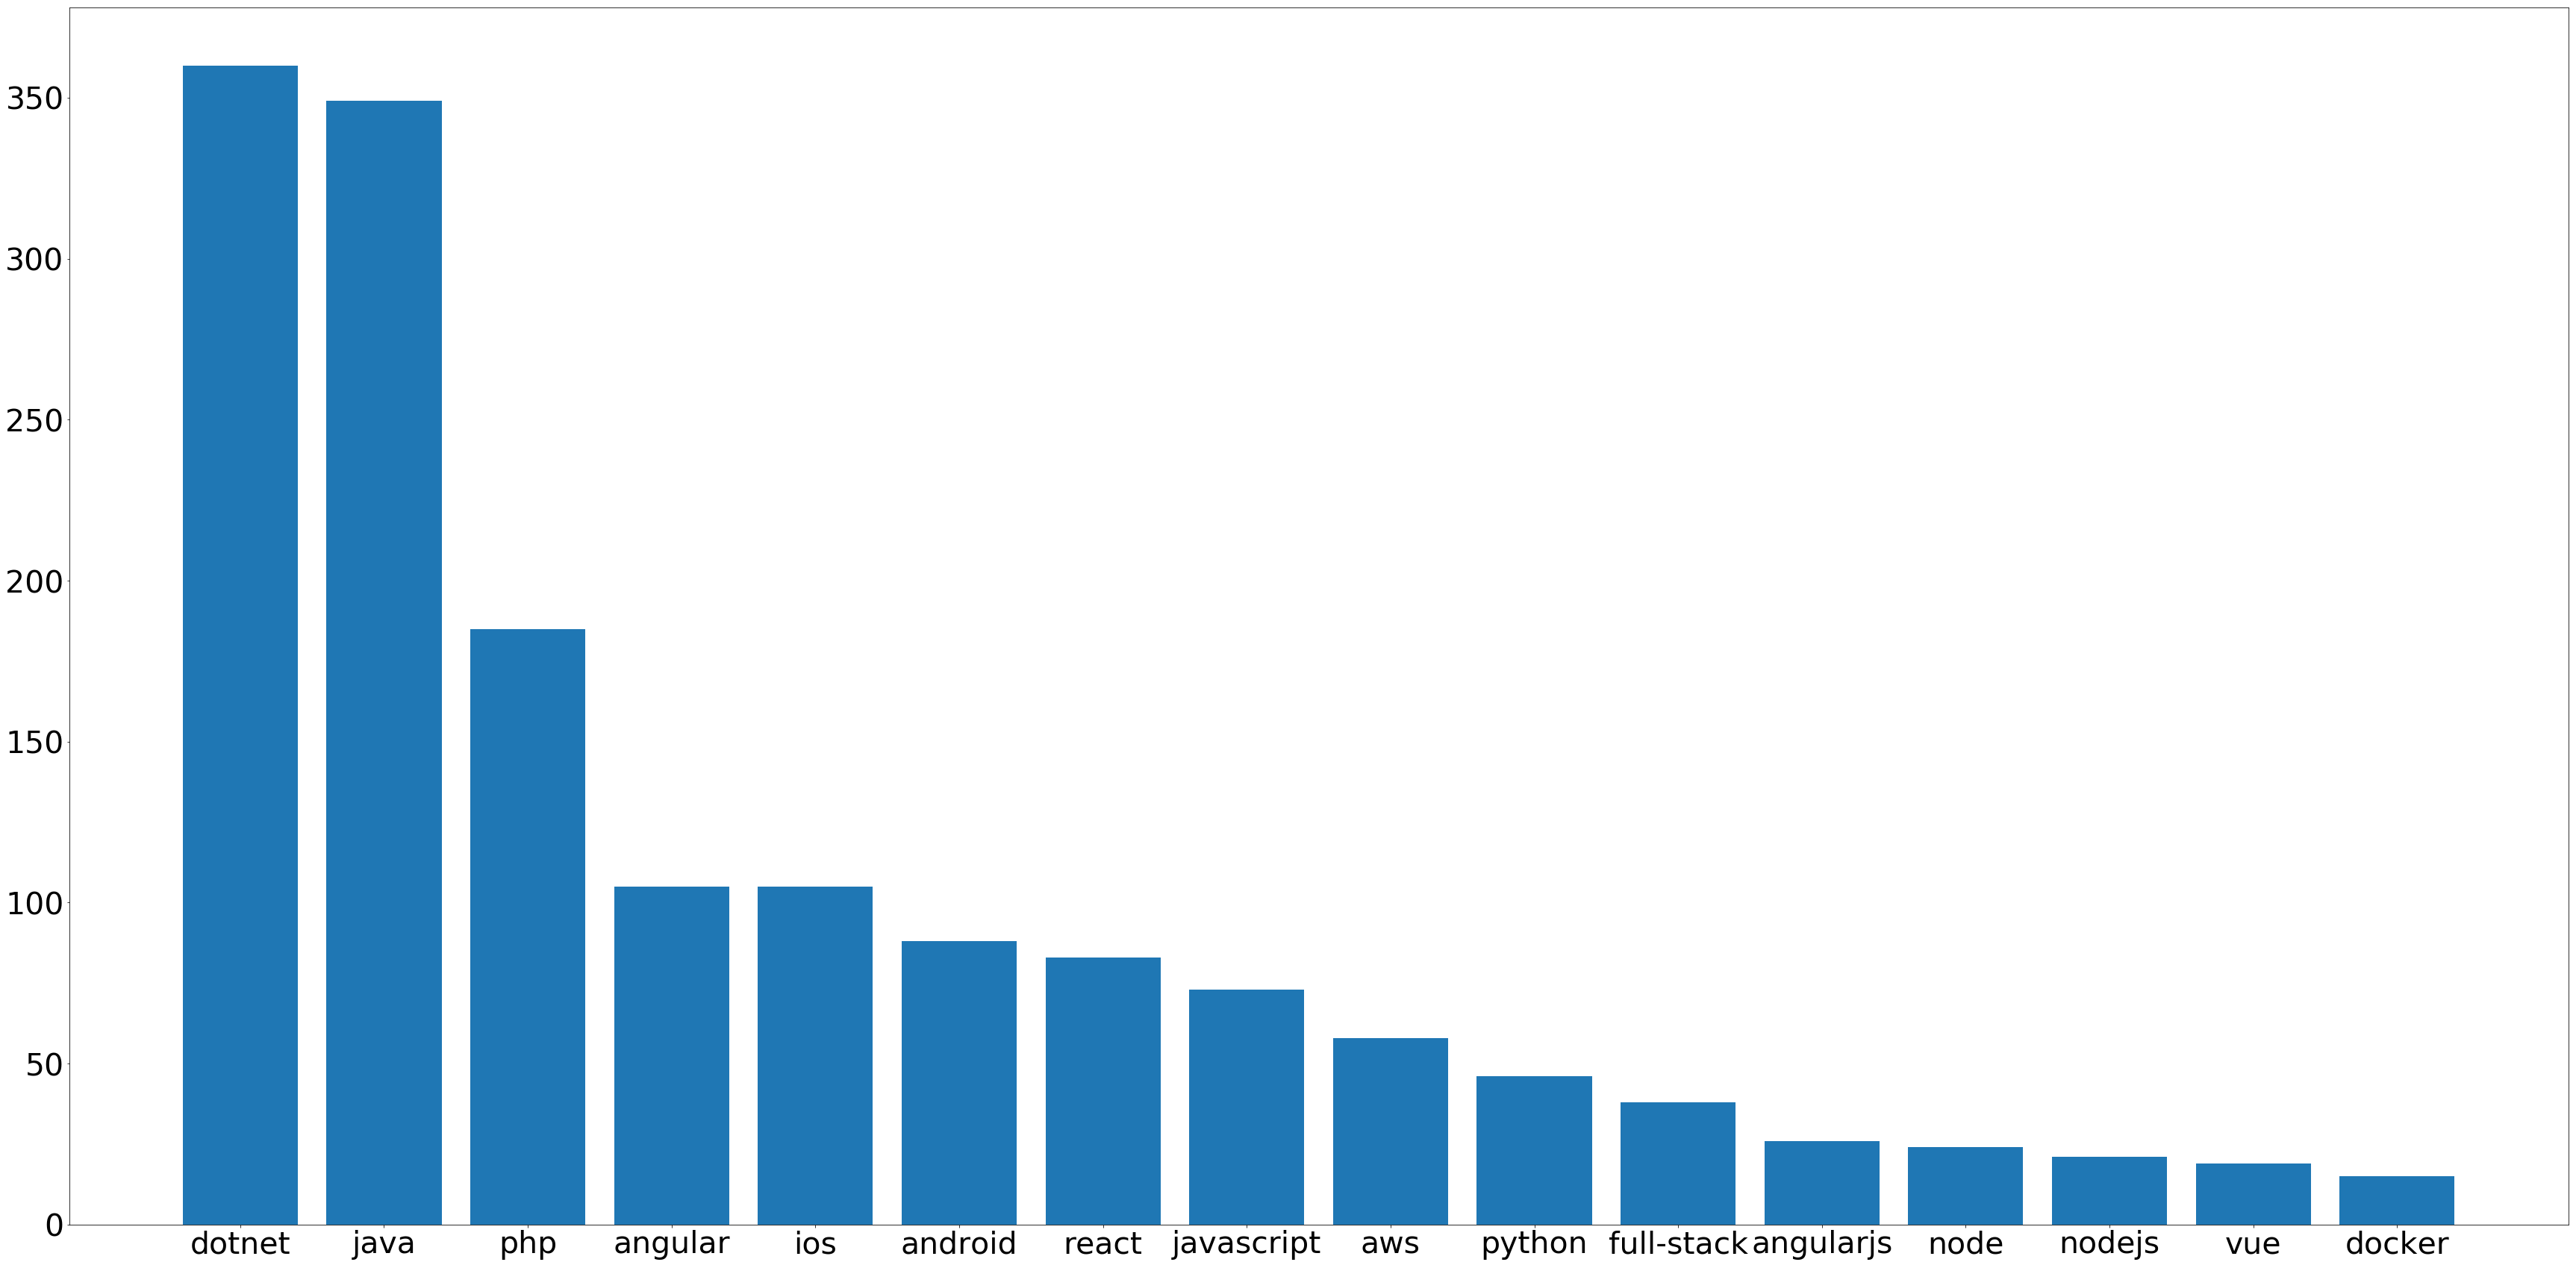

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(60,30))
plt.bar(range(len(data)), data, tick_label=labels)
plt.tick_params(labelsize=41)
plt.show()